# <font color = 'orange'> EDA With Student Performance Indicator Data

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

---

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.shape

(1000, 8)

---

## Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## <font color ='red'> Observations for above checks are very important

---

### <font color = 'blue'> Checking missing values

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### <font color = '#ff8c1a'> Observation : There is no missing values.

---

### <font color = 'blue'> Checking duplicate records

In [5]:
df.duplicated().sum()

0

#### <font color = '#ff8c1a'> Observation : There is no duplicate records.

---

### <font color = 'blue'> Checking data types

In [6]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### <font color = '#ff8c1a'> Observation : There are 5 categorical values and 3 continuous values.

---

### <font color = 'blue'> Checking unique values of each columns

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

---

### <font color = 'blue'> Checking the statistics of the dataset

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### <font color = '#ff8c1a'> Observation : 
* All the mean are very close to each other ranging between 66.054 to 69.169
* All the standard deviation are very close to each other ranging between 14.16 to 15.19
* while there is a minimum of 0 for math , 17 for reading score and 10 for writing score.
* All have maximum value same.

---

## Exploring more information about the data

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### <font color = 'blue'> We will segregate numerical and categorical feature

In [10]:
# numerical_feature = [feature for feature in df.columns if df[feature].dtype == 'int64']
# categorical_feature = [feature for feature in df.columns if df[feature].dtype == object]

numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [11]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [12]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

### <font color = 'blue'> Aggregate the total score with mean

In [13]:
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df['average_score'] = df['total_score'] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


---

## Exploring more visualization

### <font color = 'blue'> Average score with respect to gender.

<AxesSubplot:xlabel='average_score', ylabel='Count'>

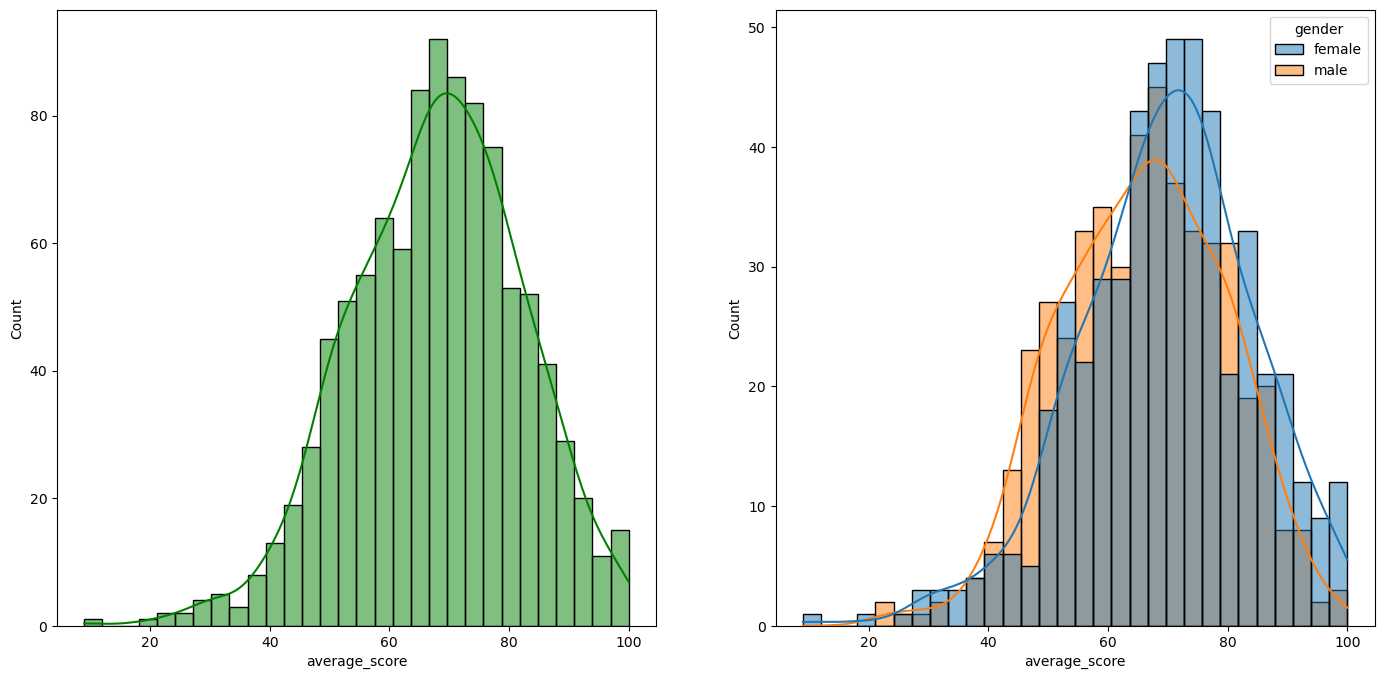

In [14]:
fig , axis = plt.subplots(1,2,figsize=(17,8))

# we want to see the average score with 30 bin size
plt.subplot(121)
sns.histplot(data = df , x = 'average_score',kde=True,bins=30,color='g')

# we want to see the average score with respect to gender feature 
plt.subplot(1,2,2)
sns.histplot(data = df , x = 'average_score',kde=True,bins=30,hue='gender')

#### <font color = '#ff8c1a'> Observation : 
* From 1st plot we can see that more student are scoring average marks in the range between 60 to 80.
* From 2nd plot(gender based observation) we can see that more **female students are scoring highest marks than male students**.

---

### <font color = 'blue'> Average score with respect to lunch.

<AxesSubplot:xlabel='average_score', ylabel='Count'>

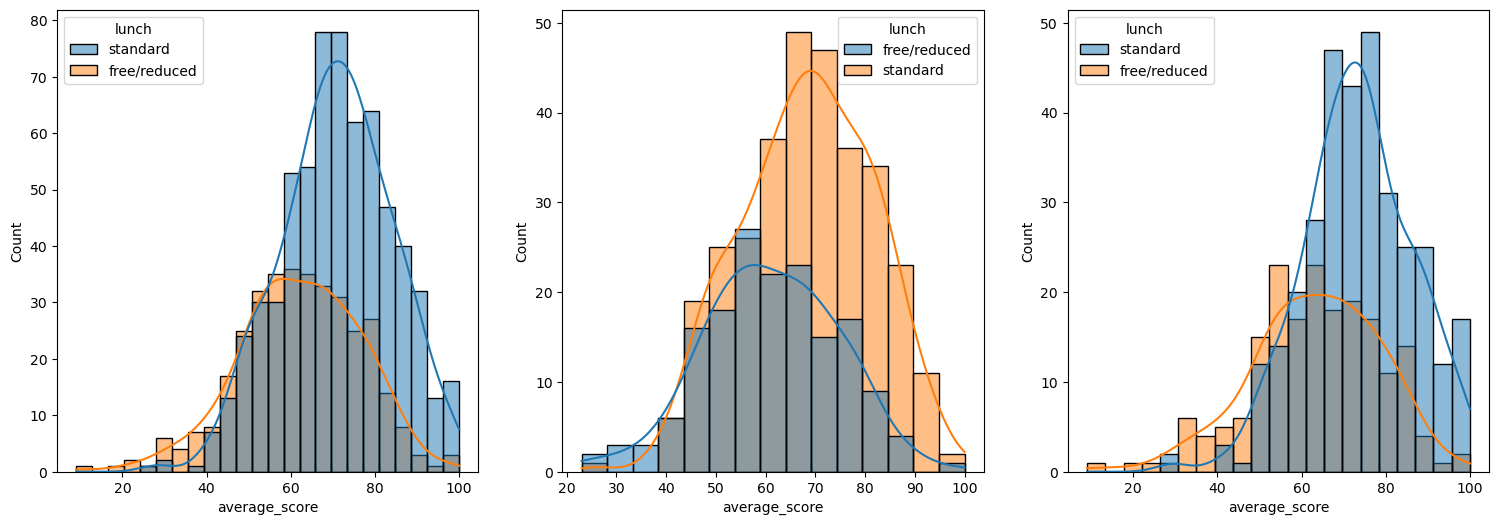

In [15]:
plt.subplots(1,3,figsize=(25,6))

# we want to see the average score with respect to lunch feature
plt.subplot(1,4,1)
sns.histplot(data = df , x = 'average_score', kde = True , hue ='lunch')

# only for male
plt.subplot(1,4,2)
sns.histplot(data = df[df['gender'] == 'male'] , x = 'average_score' , kde = True , hue ='lunch')

# only for female
plt.subplot(1,4,3)
sns.histplot(data = df[df['gender'] == 'female'] , x = 'average_score' , kde = True , hue ='lunch')

#### <font color = '#ff8c1a'> Observation : 
* Standard lunch helps students to perform well in exams(From figure 1).
* Standard lunch helps perform well in exams for both male and female gender(From figure 2 and figure 3).

---

### <font color = 'blue'> Average score with respect to parental level of education.

<AxesSubplot:xlabel='average_score', ylabel='Count'>

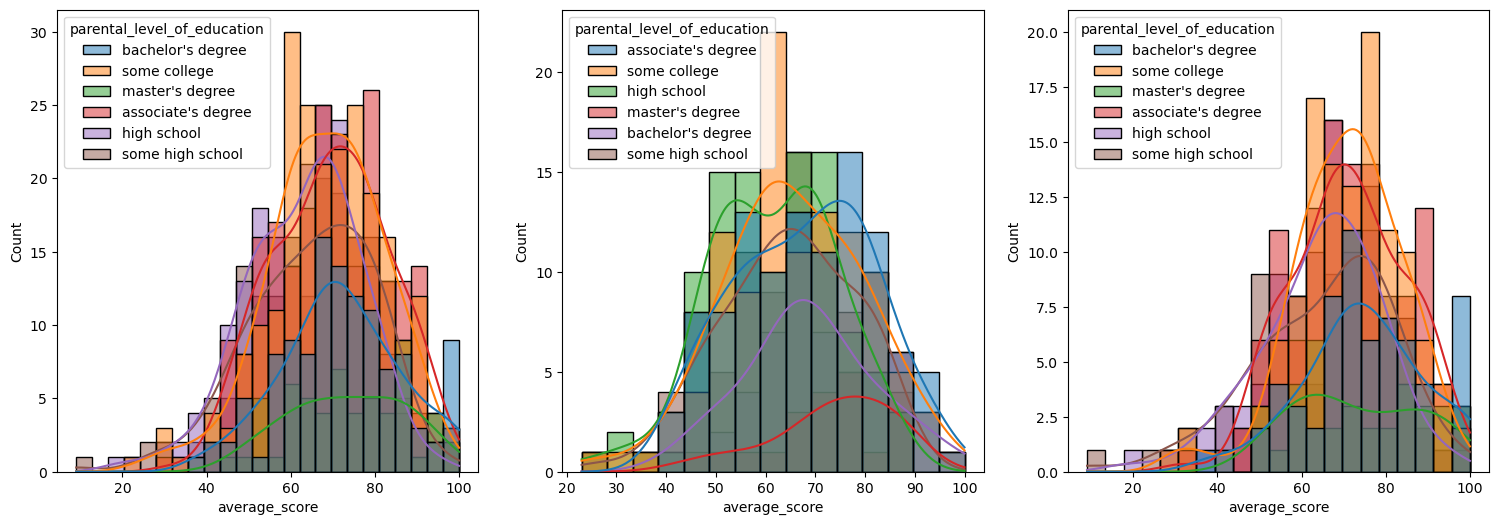

In [16]:
plt.subplots(1,3,figsize=(25,6))

# we want to see the average score with respect to lunch feature
plt.subplot(1,4,1)
sns.histplot(data = df , x = 'average_score', kde = True , hue ='parental_level_of_education')

# only for male
plt.subplot(1,4,2)
sns.histplot(data = df[df['gender'] == 'male'] , x = 'average_score' , kde = True , hue ='parental_level_of_education')

# only for female
plt.subplot(1,4,3)
sns.histplot(data = df[df['gender'] == 'female'] , x = 'average_score' , kde = True , hue ='parental_level_of_education')

#### <font color = '#ff8c1a'> Observation : 
* In general, parent's level of education don't affect the student average score(From figure 1).
* In figure 2,parent's whose **education is of assiciate's degree and master's degree their male child tends to perform well in the exams**(left skewed).
* In figure 3,there is no effect of parent's degree over female students.

---

### <font color = 'blue'> Average score with respect to race ethnicity.

<AxesSubplot:xlabel='average_score', ylabel='Count'>

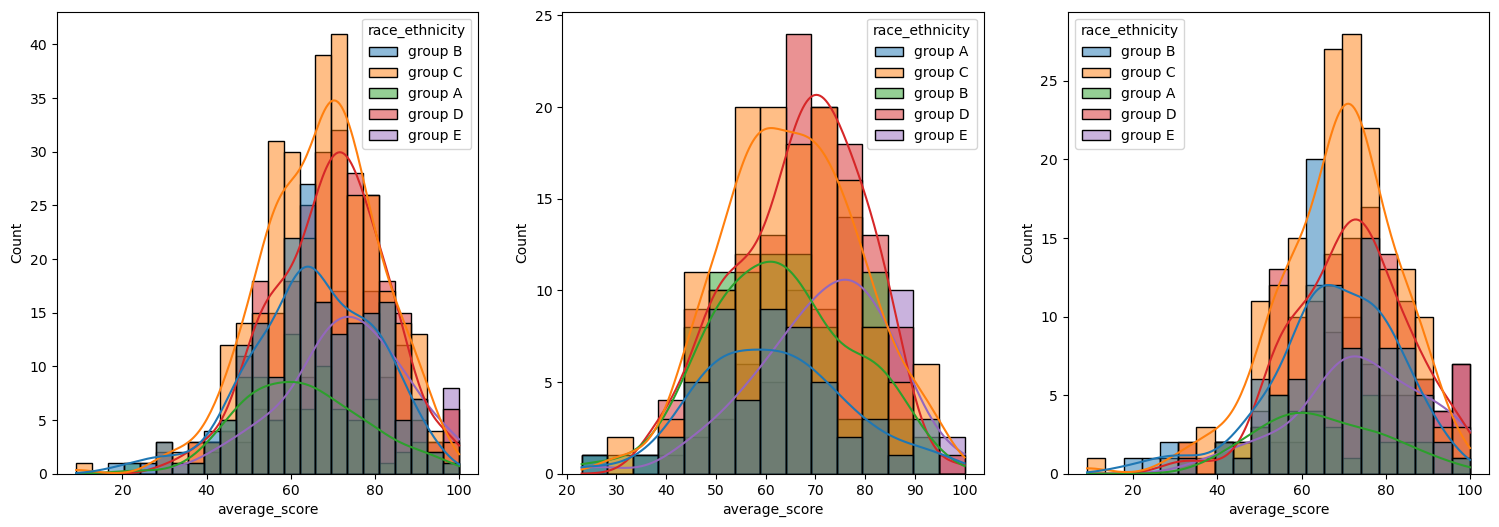

In [17]:
plt.subplots(1,3,figsize = (25,6))

plt.subplot(1,4,1)
sns.histplot(data = df,x = 'average_score',kde = True,hue = 'race_ethnicity')

plt.subplot(1,4,2)
sns.histplot(data = df[df['gender'] == 'male'],x = 'average_score',kde = True,hue = 'race_ethnicity')

plt.subplot(1,4,3)
sns.histplot(data = df[df['gender'] == 'female'],x = 'average_score',kde = True,hue = 'race_ethnicity')

#### <font color = '#ff8c1a'> Observation : 
* Student belong to group **A** and group **B**(right sckewed) race enthnicity tends to **perform poorly**(score less average marks) in the exams(From figure 1).
* Student belong to group **A** and group **B** race enthnicity tends to **perform poorly** in the exams irrespective of gender(From figure 2 and 3).

---

### <font color = 'blue'> Average score with respect to test preparation course.

<AxesSubplot:xlabel='average_score', ylabel='Count'>

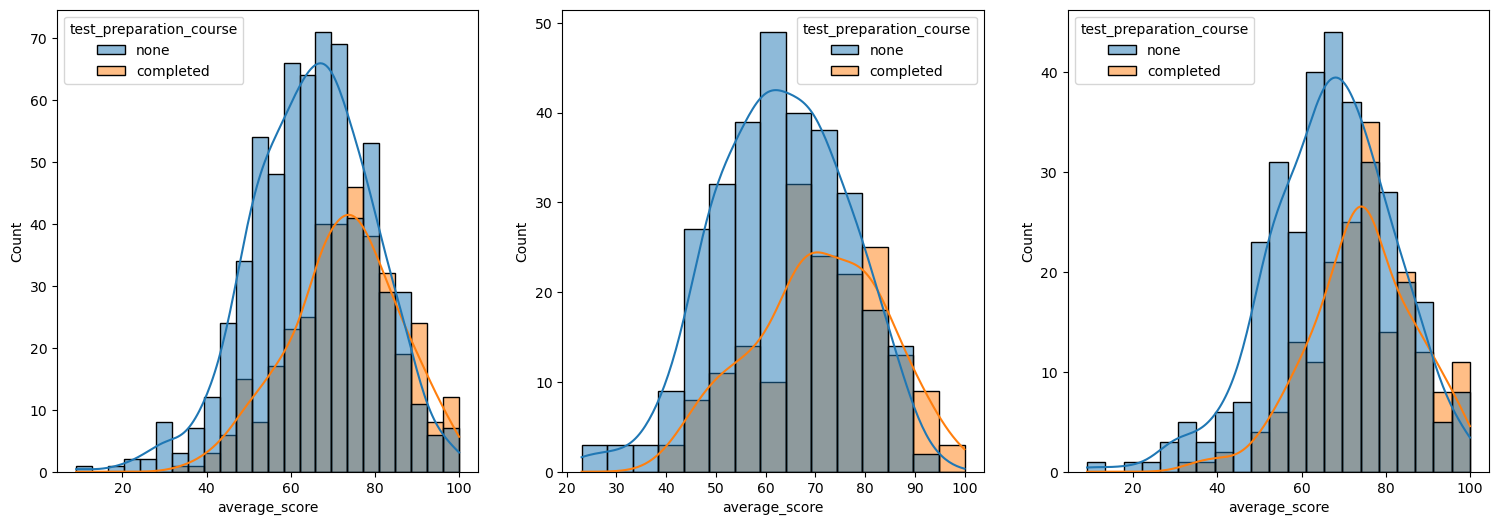

In [18]:
plt.subplots(1,3,figsize = (25,6))

plt.subplot(1,4,1)
sns.histplot(data = df,x = 'average_score',kde = True,hue = 'test_preparation_course')

plt.subplot(1,4,2)
sns.histplot(data = df[df['gender'] == 'male'],x = 'average_score',kde = True,hue = 'test_preparation_course')

plt.subplot(1,4,3)
sns.histplot(data = df[df['gender'] == 'female'],x = 'average_score',kde = True,hue = 'test_preparation_course')

#### <font color = '#ff8c1a'> Observation : 
* In general, students who have completed test preparation tends to perform well in exams(From figure 1).
* In figure 2, **male students** who have **completed test preparation** tends to **perform well** in exams.
* In figure 3, test preparation has **no effect** in **female students performance**.

---

### <font color = 'blue'> Relationship between the numerical feature.

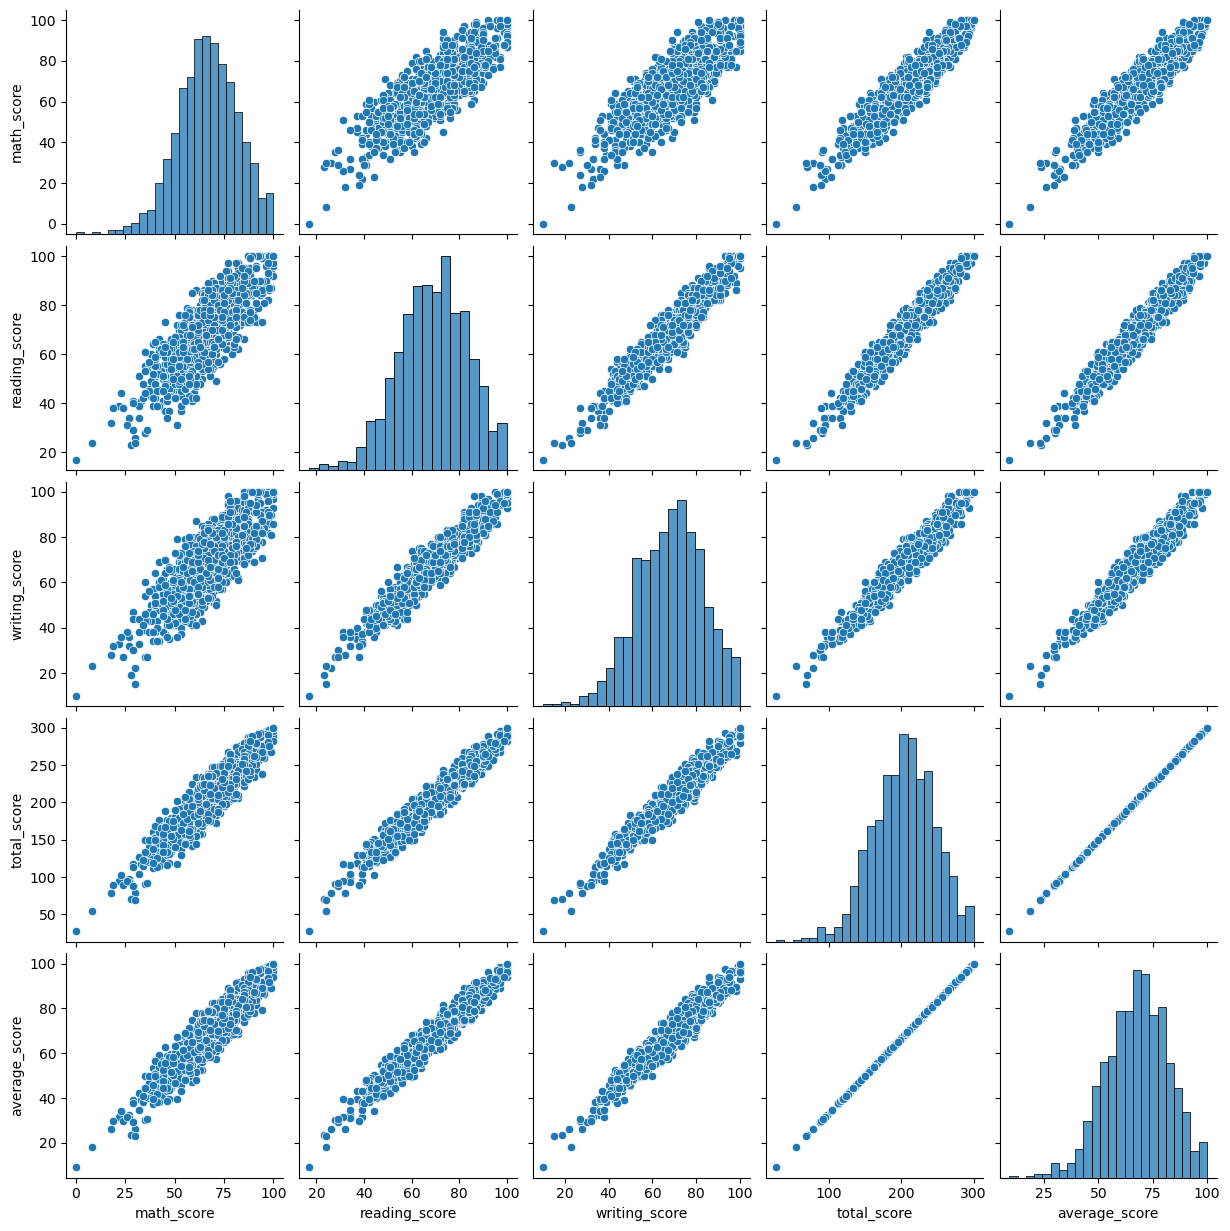

In [19]:
sns.pairplot(df)

---

### <font color = 'blue'> Relationship between the categorical feature.

<AxesSubplot:>

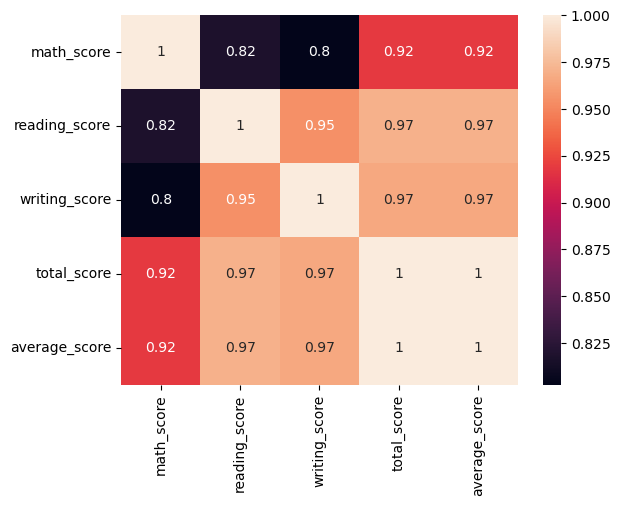

In [20]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

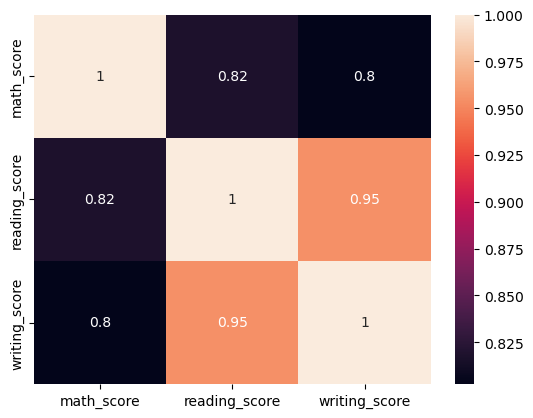

In [21]:
sns.heatmap(df[['math_score','reading_score','writing_score']].corr(),annot=True)

---